In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
uploaded = pd.read_csv("/content/drive/MyDrive/rainfall_data.csv")

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "Date/Time" with length 78848 bytes
User uploaded file "Current rainfall (mm)" with length 78848 bytes
User uploaded file "Cumulative rainfall (mm)" with length 78848 bytes


In [5]:
df_rain = pd.read_csv("/content/drive/MyDrive/rainfall_data.csv")

In [6]:
df_rain

,Date/Time,Current rainfall (mm),Cumulative rainfall (mm)
0,2018-12-02 18:00:00,0.0,0.0
1,2018-12-02 17:00:00,0.0,0.0
2,2018-12-02 16:00:00,0.0,0.0
3,2018-12-02 15:00:00,0.0,0.0
4,2018-12-02 14:00:00,0.0,0.0
...,...,...,...
78843,2009-12-01 04:00:00,0.0,0.2
78844,2009-12-01 03:00:00,0.0,0.2
78845,2009-12-01 02:00:00,0.0,0.2
78846,2009-12-01 01:00:00,0.0,0.2


In [7]:
df_rain.isnull().sum()

,0
Date/Time,0
Current rainfall (mm),4
Cumulative rainfall (mm),1


In [8]:
numeric_columns = ['Current rainfall (mm)', 'Cumulative rainfall (mm)']
df_filled_mean = df_rain[numeric_columns].fillna(df_rain[numeric_columns].mean())
df_rain = pd.concat([df_rain['Date/Time'], df_filled_mean], axis=1)

In [9]:
df_rain.isnull().sum()

,0
Date/Time,0
Current rainfall (mm),0
Cumulative rainfall (mm),0


In [10]:
df_rain.describe()

,Current rainfall (mm),Cumulative rainfall (mm)
count,78848.000000,78848.000000
mean,0.049206,0.586580
std,0.765277,2.770198
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,110.000000,111.400000


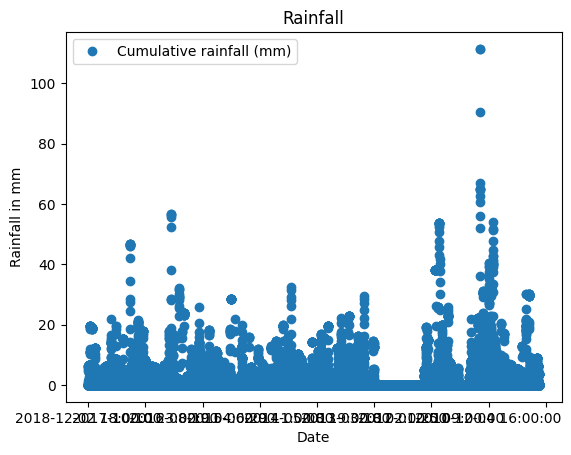

In [11]:
df_rain.plot(x='Date/Time', y='Cumulative rainfall (mm)', style='o')

plt.title('Rainfall')
plt.xlabel('Date')
plt.ylabel('Rainfall in mm')
plt.show()

In [13]:
uploaded = pd.read_csv("/content/drive/MyDrive/rainfall_data.csv")
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "Date/Time" with length 78848 bytes
User uploaded file "Current rainfall (mm)" with length 78848 bytes
User uploaded file "Cumulative rainfall (mm)" with length 78848 bytes


In [14]:
df_river = pd.read_csv("/content/drive/MyDrive/river_hourly_data.csv")

In [15]:
df_river

,Date/Time,Level (mm)
0,12/2/2018 17:00,1.61
1,12/2/2018 16:00,1.61
2,12/2/2018 15:00,1.62
3,12/2/2018 14:00,1.63
4,12/2/2018 13:00,1.63
...,...,...
78817,12/2/2009 4:00,1.39
78818,12/2/2009 3:00,1.39
78819,12/2/2009 2:00,1.40
78820,12/2/2009 1:00,1.40


In [16]:
df_river.isnull().sum()

,0
Date/Time,0
Level (mm),0


In [17]:
df_river.describe()

,Level (mm)
count,78822.000000
mean,1.453701
std,0.113859
min,0.000000
25%,1.400000
50%,1.450000
75%,1.500000
max,3.300000


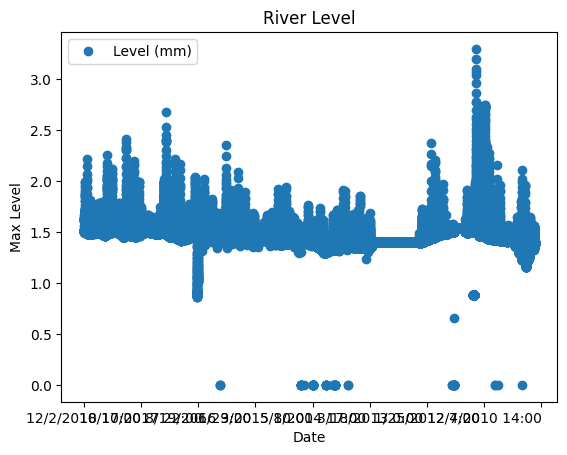

In [19]:
df_river.plot(x='Date/Time', y='Level (mm)', style='o')
plt.title('River Level')
plt.xlabel('Date')
plt.ylabel('Max Level')
plt.show()

In [20]:
df = pd.merge(df_rain, df_river, how='outer', on=['Date/Time'])
df.head()

,Date/Time,Current rainfall (mm),Cumulative rainfall (mm),Level (mm)
0,1/1/2010 0:00,NaN,NaN,1.58
1,1/1/2010 10:00,NaN,NaN,1.45
2,1/1/2010 11:00,NaN,NaN,1.45
3,1/1/2010 12:00,NaN,NaN,1.44
4,1/1/2010 13:00,NaN,NaN,1.44


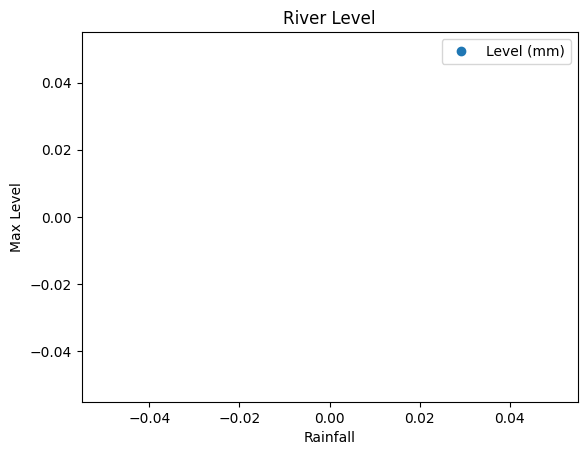

In [24]:
df.plot(x='Cumulative rainfall (mm)', y='Level (mm)', style='o')
plt.title('River Level')
plt.xlabel('Rainfall')
plt.ylabel('Max Level')
plt.show()